In [48]:
from sklearn.datasets import load_boston

In [49]:
boston_bunch = load_boston()

In [50]:
import pandas as pd

In [51]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']

In [52]:
boston_df = pd.DataFrame(boston_bunch.data,columns=features)

In [53]:
boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [54]:
boston_df['Price'] = boston_bunch.target

In [55]:
X = boston_df.drop("Price",1)

In [56]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [57]:
y = boston_df['Price']

In [58]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [31]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
sfs = SFS(LinearRegression(),k_features=6,forward=False,floating=False,scoring='r2',cv=0)

In [48]:
sfs.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=6, scoring='r2')

In [49]:
sfs.k_feature_names_

('NOX', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT')

In [59]:
import statsmodels.api as sm

In [60]:
import statsmodels.formula.api as smf

# Backward eliination

In [82]:
def backward_elimination_test(data,target,significance_level=0.05):
    features = data.columns.tolist()
    print(features)
    while(len(features)>0):
        print(len(features))
        feature_with_constant = sm.add_constant(data[features])
        print(feature_with_constant)
        p_values=sm.OLS(target,feature_with_constant).fit().pvalues[1:]
        print(p_values)
        max_p_value = p_values.max()
        print(max_p_value)
        if (max_p_value>=significance_level):
            exclude_feature = p_values.idxmax()
            features.remove(exclude_feature)
        else:
            break
    return features

In [83]:
backward_elimination_test(X,y)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
13
     const     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0      1.0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1      1.0  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2      1.0  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3      1.0  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4      1.0  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..     ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501    1.0  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502    1.0  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503    1.0  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504    1.0  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505    1.0  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

['CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

# In built implementation 

In [88]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
# Sequentail Backward Elimination

In [91]:
sbs = SFS(LinearRegression(),k_features=10,forward=False,floating=False,cv=0)

In [92]:
sbs.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=10)

In [93]:
sbs.k_feature_names_

('CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')

In [110]:
sfs = SFS(LinearRegression(),k_features=(3,10),forward=False,floating=False,cv=0)

In [111]:
sfs.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=(3, 10))

In [112]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_chart_sfs

In [113]:
import matplotlib.pyplot as plt 

c:\python37-32\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\python37-32\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


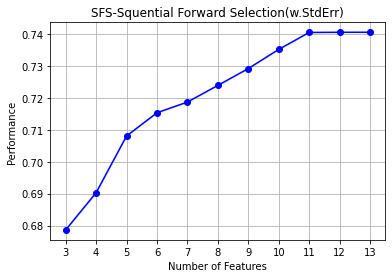

In [114]:
fig = plot_chart_sfs(sfs.get_metric_dict(),kind='std_dev')
plt.title('SFS-Squential Forward Selection(w.StdErr)')
plt.grid()
plt.show()

In [120]:
stepwiseselection = SFS(LinearRegression(),k_features=(3,10),forward=True,floating=True,cv=0)

In [121]:
stepwiseselection.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), floating=True,
                          k_features=(3, 10))

In [122]:
stepwiseselection.k_feature_names_

('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT')

c:\python37-32\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\python37-32\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


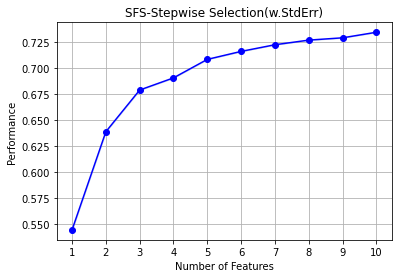

In [123]:
fig = plot_chart_sfs(stepwiseselection.get_metric_dict(),kind='std_dev')
plt.title('SFS-Stepwise Selection(w.StdErr)')
plt.grid()
plt.show()